In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

Use Pandas to import the data from epa-sea-level.csv

In [123]:
df = pd.read_csv('data/epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis

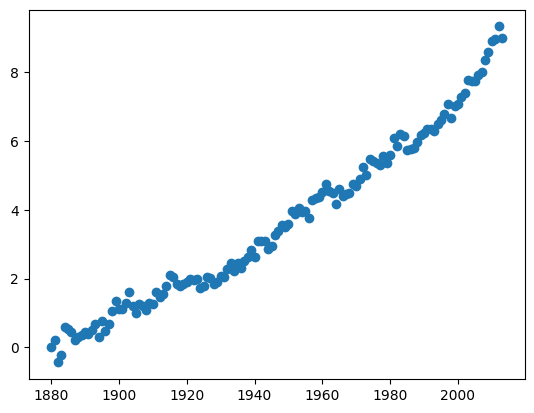

In [125]:
fig, axes = plt.subplots()

axes.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])

Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050

In [126]:
res = linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
res

LinregressResult(slope=0.06304458401213482, intercept=-119.06594196773983, rvalue=0.984757131182585, pvalue=3.788696979113155e-102, stderr=0.0009692118713287152, intercept_stderr=1.886943381242523)

In [127]:
# y = ax + b
# line = slope * x + intercept

# Como eu fiz (não coloquei limite superior no ano):
line = pd.DataFrame()
line['Year'] = df['Year'].copy()
line['Predicted'] = line['Year']*res.slope + res.intercept
print(line)
print()

# Outra maneira de fazer:
x_pred = pd.Series([i for i in range(1880, 2051)])
y_pred = res.slope*x_pred + res.intercept
print(y_pred)

     Year  Predicted
0    1880  -0.542124
1    1881  -0.479079
2    1882  -0.416035
3    1883  -0.352990
4    1884  -0.289946
..    ...        ...
129  2009   7.590627
130  2010   7.653672
131  2011   7.716716
132  2012   7.779761
133  2013   7.842806

[134 rows x 2 columns]

0      -0.542124
1      -0.479079
2      -0.416035
3      -0.352990
4      -0.289946
         ...    
166     9.923277
167     9.986322
168    10.049366
169    10.112411
170    10.175455
Length: 171, dtype: float64


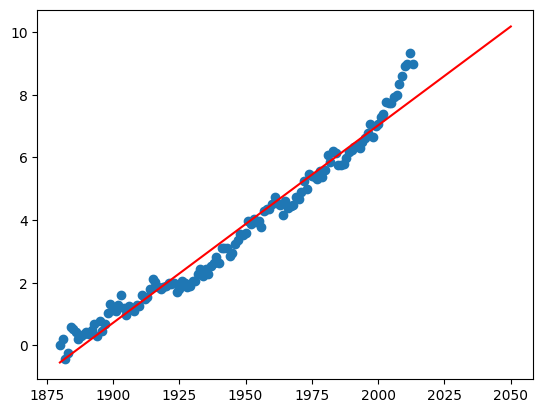

In [128]:
axes.plot(x_pred, y_pred, color='red')
fig

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000

In [129]:
new_df = df.loc[df['Year'] >= 2000]

res2 = linregress(x=new_df['Year'], y=new_df['CSIRO Adjusted Sea Level'])
res2

LinregressResult(slope=0.1665008218406594, intercept=-325.9412257601265, rvalue=0.9706436838638605, pvalue=3.758364132175293e-08, stderr=0.012439846941724349, intercept_stderr=24.966816199610737)

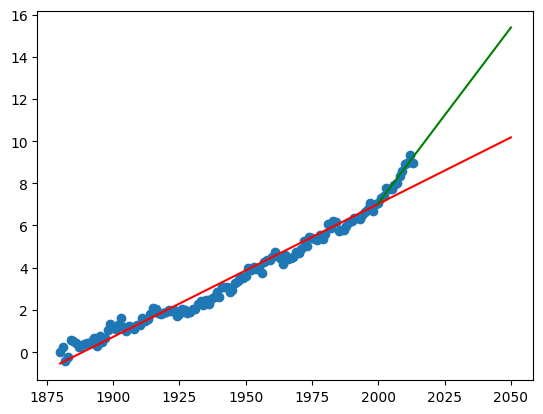

In [130]:
x_pred2 = pd.Series([i for i in range(2000, 2051)])
y_pred2 = res2.slope*x_pred2 + res2.intercept
axes.plot(x_pred2, y_pred2, color='green')
fig

The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level

In [131]:
axes.set_title('Rise in Sea Level')
axes.set_xlabel('Year')
axes.set_ylabel('Sea Level (inches)')

Text(4.444444444444445, 0.5, 'Sea Level (inches)')